# Sparse and Non Negative Shallow Auto Encoder without AMD
* Sparsity Regularizer : Difference between Hoyer sparsity measure and objective value (0.6).
* Non-Negativity Regularizer : Non Negativity Constraint
* Number of epochs for training: 500 epochs
* Activation of the encoder: Sigmoid
* Activation of the decoder: LeakyRELU (useless in case of Non-Negativity)
## Impact of the value of the sparsity parameters
* Sparsity objective: 0.6
* Sparsity weight: 0.1, 0.5, 1, 5



In [7]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from shallowAE import ShallowAE
from AsymAE_infoGAN.nonNegSparseAsymAEinfoGAN import Sparse_NonNeg_AsymAEinfoGAN_Hoyer_NonNegConstraint
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

'2.2.0'

In [8]:
FILE_PATH = "../"
x_test, _ = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
x_small = x_test[:10]
x_small[2] = x_test[31]
print('x_small shape:', x_small.shape)

x_small shape: (10, 28, 28, 1)


In [10]:
results = pd.read_csv("../Results/AsymAE_infoGAN/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_30results")
results

,Unnamed: 0,sparsity_objective,sparsity_weight,test_Hoyer_loss,test_error,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_Hoyer_loss,training_error,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,0.6,0.0005,0.0,0.008917,1.116534,1.172391,0.312038,0.0,0.008669,1.113312,1.169376,0.312695
1,1,0.6,0.0010,0.0,0.009138,1.032031,1.068238,0.343546,0.0,0.008882,1.028392,1.065270,0.344040
2,2,0.6,0.0050,0.0,0.010236,0.579921,0.599512,0.465833,0.0,0.009853,0.578668,0.598659,0.466317
3,3,0.6,0.0100,0.0,0.010864,0.386393,0.396352,0.545230,0.0,0.010418,0.385422,0.395931,0.545298
4,4,0.6,0.0500,0.0,0.011555,0.246490,0.265750,0.598672,0.0,0.010926,0.245668,0.265599,0.598188
5,5,0.6,0.1000,0.0,0.012272,0.292780,0.297089,0.598381,0.0,0.011500,0.292856,0.297354,0.597832
6,6,0.6,0.5000,0.0,0.014523,0.391527,0.408241,0.598954,0.0,0.013565,0.390503,0.406815,0.598848
7,7,0.6,1.0000,0.0,0.015861,0.443474,0.459716,0.599375,0.0,0.014430,0.442160,0.458226,0.599322


In [11]:
max_values = results.max(axis=0)
max_idx = results.idxmax()
min_values = results.min(axis=0)
min_idx = results.idxmin()
median_values = results.median()
std_values = results.std()
sparsity_objectives = results['sparsity_objective']
sparsity_weights = results['sparsity_weight']

In [12]:

print('***********************Maximum values**********************')
print(max_values[1:])
print('\n')
print('***********************Minimum values**********************')
print(min_values[1:])
print('\n')
print('***********************Median values**********************')
print(median_values[1:])


***********************Maximum values**********************
sparsity_objective                                 0.600000
sparsity_weight                                    1.000000
test_Hoyer_loss                                    0.000000
test_error                                         0.015861
test_max_approx_error_toOriginal_dilatation        1.116534
test_max_approx_error_toRec_dilatation             1.172391
test_sparsity                                      0.599375
training_Hoyer_loss                                0.000000
training_error                                     0.014430
training_max_approx_error_toOriginal_dilatation    1.113312
training_max_approx_error_toRec_dilatation         1.169376
training_sparsity                                  0.599322
dtype: float64


***********************Minimum values**********************
sparsity_objective                                 0.600000
sparsity_weight                                    0.000500
test_Hoyer_loss        

In [14]:
print('\033[1m'+'Lowest error: '+'\033[0m' , round(min_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_error']], ', sparsity_weight=', sparsity_weights[min_idx['test_error']], '\n')
print('\033[1m'+'Highest error: '+'\033[0m', round(max_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_error']], ', sparsity_weight=', sparsity_weights[max_idx['test_error']], '\n')
print('\033[1m'+'Least sparse: '+'\033[0m' , round(min_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[min_idx['test_sparsity']], '\n')
print('\033[1m'+'Most sparse: '+'\033[0m', round(max_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[max_idx['test_sparsity']], '\n')
print('\033[1m'+'Lowest Max-approximation error to dilatation of the originals: '+'\033[0m' , round(min_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Highest  Max-approximation error to dilatation of the originals: '+'\033[0m', round(max_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Lowest KL-loss: '+'\033[0m' , round(min_values['test_Hoyer_loss'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_Hoyer_loss']], ', sparsity_weight=', sparsity_weights[min_idx['test_Hoyer_loss']], '\n')
print('\033[1m'+'Highest KL-loss: '+'\033[0m', round(max_values['test_Hoyer_loss'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_Hoyer_loss']], ', sparsity_weight=', sparsity_weights[max_idx['test_Hoyer_loss']], '\n')
print('\033[1m'+'Lowest max-approximation error to dilatation of the reconstruction: '+'\033[0m' , round(min_values['test_max_approx_error_toRec_dilatation'], 5), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toRec_dilatation']], '\n')
print('\033[1m'+'Highest max-approximation error to dilatation of the reconstruction: '+'\033[0m', round(max_values['test_max_approx_error_toRec_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toRec_dilatation']], '\n')


Lowest error:  0.0089 , sparsity_objective= 0.6 , sparsity_weight= 0.0005 

Highest error:  0.0159 , sparsity_objective= 0.6 , sparsity_weight= 1.0 

Least sparse:  0.312 , sparsity_objective= 0.6 , sparsity_weight= 0.0005 

Most sparse:  0.5994 , sparsity_objective= 0.6 , sparsity_weight= 1.0 

Lowest Max-approximation error to dilatation of the originals:  0.2465 , sparsity_objective= 0.6 , sparsity_weight= 0.05 

Highest  Max-approximation error to dilatation of the originals:  1.1165 , sparsity_objective= 0.6 , sparsity_weight= 0.0005 

Lowest KL-loss:  0.0 , sparsity_objective= 0.6 , sparsity_weight= 0.0005 

Highest KL-loss:  0.0 , sparsity_objective= 0.6 , sparsity_weight= 0.0005 

Lowest max-approximation error to dilatation of the reconstruction:  0.26575 , sparsity_objective= 0.6 , sparsity_weight= 0.05 

Highest max-approximation error to dilatation of the reconstruction:  1.1724 , sparsity_objective= 0.6 , sparsity_weight= 0.0005 



Nb:
* Lowest error reached with weakest sparsity constraints.
* Highest error reached with strongest sparsity constraints.
* All get quite low error.
* All get sparsity metric close to 0.6
* Lowest max-approximation error to dilatation of the originals and of the reconstruction reached with the weakest sparsity constraint ! ! ! 

In [16]:
sparsity_objectives = np.load('../Results/AsymAE_infoGAN/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_30_sparsityObjectives_dim100.npy')
sparsity_weights = np.load('../Results/AsymAE_infoGAN/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_30_sparsityWeights_dim100.npy')
test_mse = np.load('../Results/AsymAE_infoGAN/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_30_test_errors_dim100.npy')
train_mse = np.load('../Results/AsymAE_infoGAN/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_30_training_errors_dim100.npy')
test_Hoyer_loss = np.load('../Results/AsymAE_infoGAN/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_30_test_Hoyer_loss_dim100.npy')
train_Hoyer_loss = np.load('../Results/AsymAE_infoGAN/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_30_training_Hoyer_loss_dim100.npy')
test_max_approx_to_Original = np.load('../Results/AsymAE_infoGAN/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_30_test_max_approx_error_toOriginal_dilation_dim100.npy')
train_max_approx_to_Original = np.load('../Results/AsymAE_infoGAN/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_30_training_max_approx_error_toOriginal_dilatation_dim100.npy')
test_max_approx_to_Rec = np.load('../Results/AsymAE_infoGAN/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_30_test_max_approx_error_toRec_dilation_dim100.npy')
train_max_approx_to_Rec = np.load('../Results/AsymAE_infoGAN/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_30_training_max_approx_error_toRec_dilatation_dim100.npy')
test_sparsity = np.load('../Results/AsymAE_infoGAN/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_30_test_sparsity_dim100.npy')
train_sparsity = np.load('../Results/AsymAE_infoGAN/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_30_training_sparsity_dim100.npy')

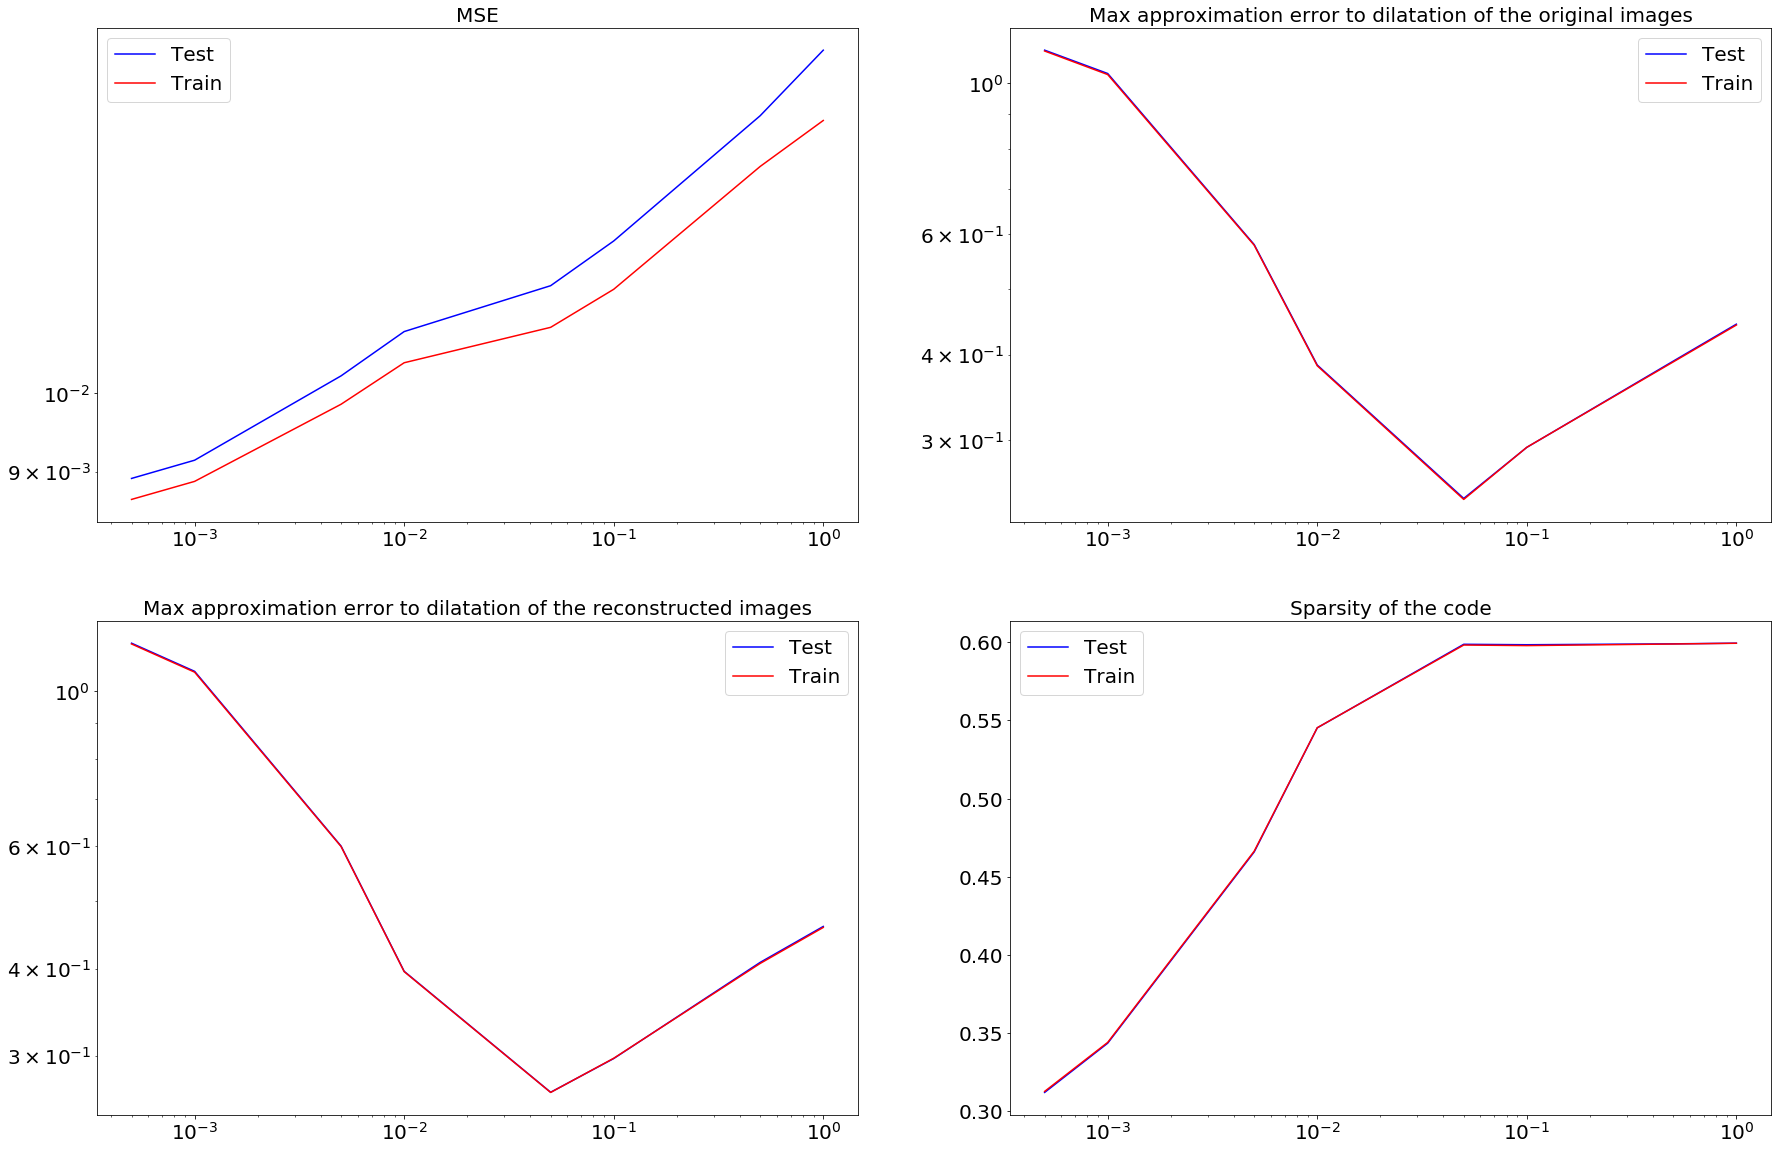

In [17]:
plt.figure(figsize=(30,20))
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20) 
ax = plt.subplot(2, 2, 1)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, train_mse[:,0], 'r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Test', 'Train'])
ax.set_title('MSE')

ax = plt.subplot(2, 2, 2)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,0], 'r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Test', 'Train'])
ax.set_title('Max approximation error to dilatation of the original images')

ax = plt.subplot(2, 2, 3)
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,0], 'r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Test', 'Train'])
ax.set_title('Max approximation error to dilatation of the reconstructed images')


ax = plt.subplot(2, 2, 4)
ax.plot(sparsity_weights, test_sparsity[:,0], 'b')
ax.plot(sparsity_weights, train_sparsity[:,0], 'r')
ax.set_xscale('log')
ax.legend(['Test', 'Train'])
ax.set_title('Sparsity of the code')

plt.show()

# 1. Sparsity_Objective = 0.06

## 1.1 Sparsity_weight = 0.0005 (sp_o = 0.06)

Original images and reconstructions - Reconstruction error:  0.008917193076014518


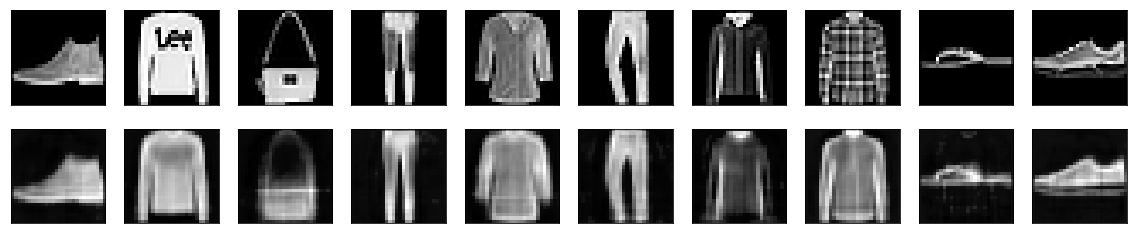

Histograms of the encodings - Sparsity (Hoyer):  0.3120380640029907


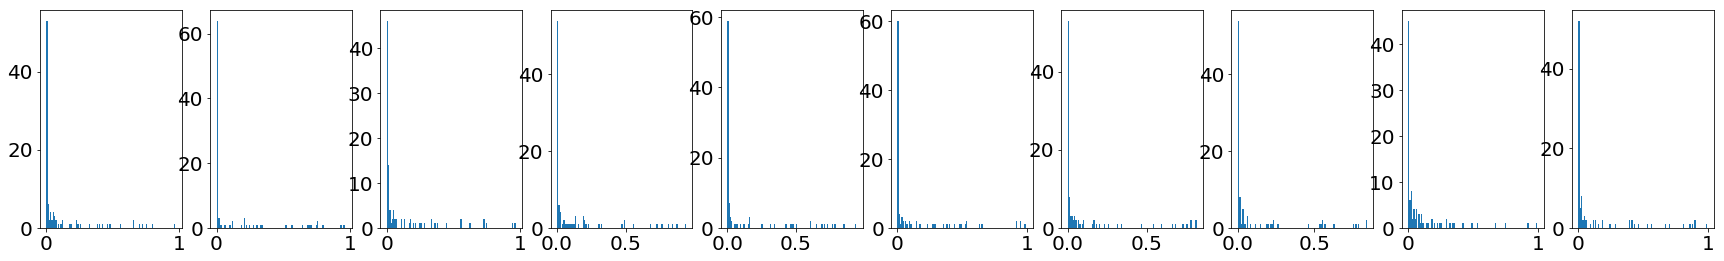

Atom images of the decoder


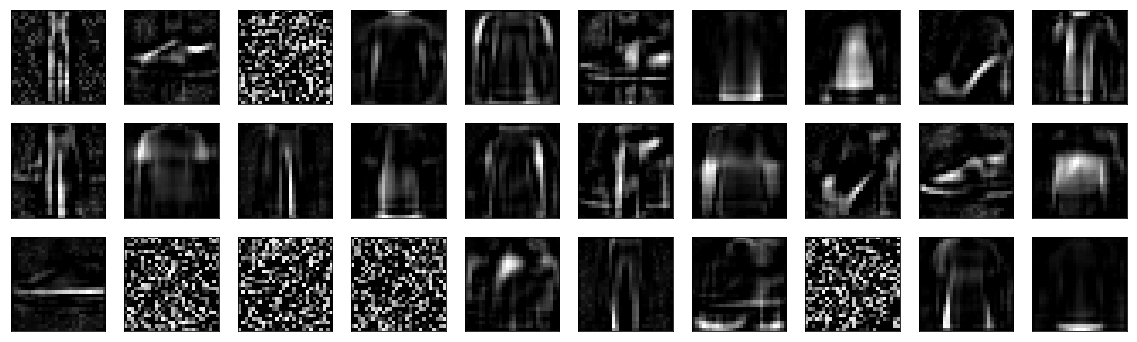

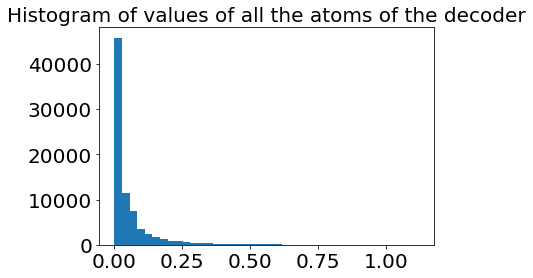

In [23]:
i = np.arange(8)[sparsity_weights==0.0005][0]
j = np.arange(1)[sparsity_objectives==0.6][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_Hoyer_NonNegConstraint.load('18_10_30_dim100_Hoyer_0.1_0.6_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


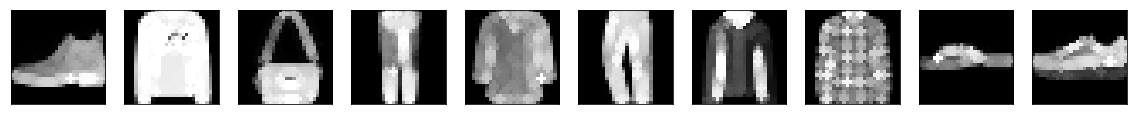

Dilatation of the reconstructions


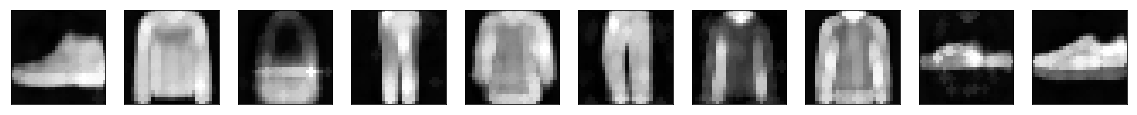

Original images and max-approximation to dilatation
Max-approx error to original:  1.116533749103546  - Max-approx error to reconstruction:  1.1723914434432983


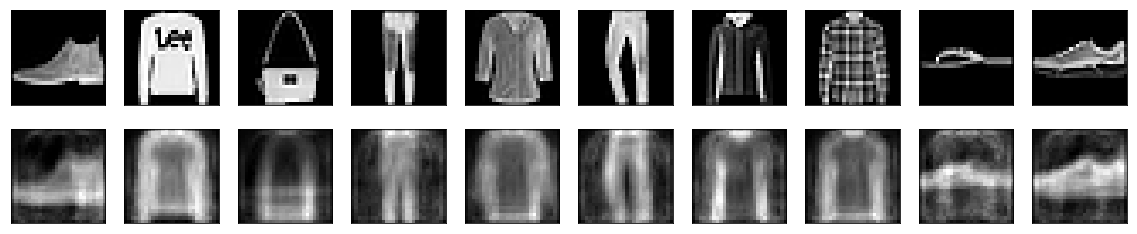

Dilated of the atom images of the decoder


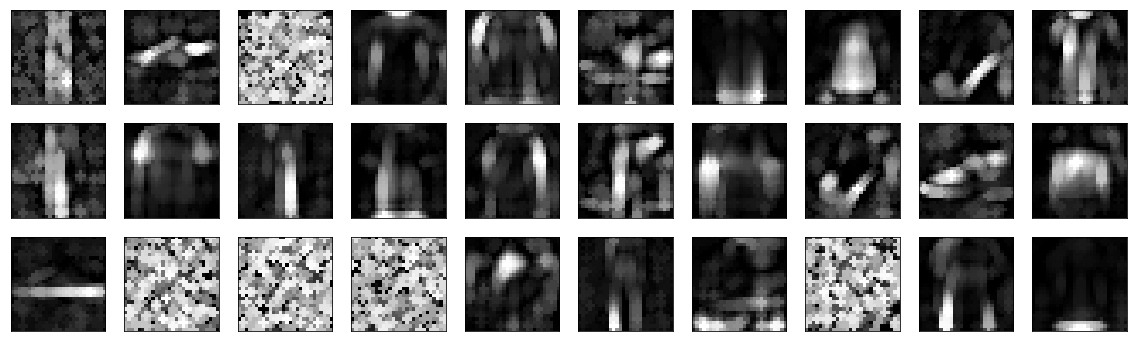

In [24]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.2 Sparsity_weight = 0.001 (sp_o = 0.6)

Original images and reconstructions - Reconstruction error:  0.009138470318913459


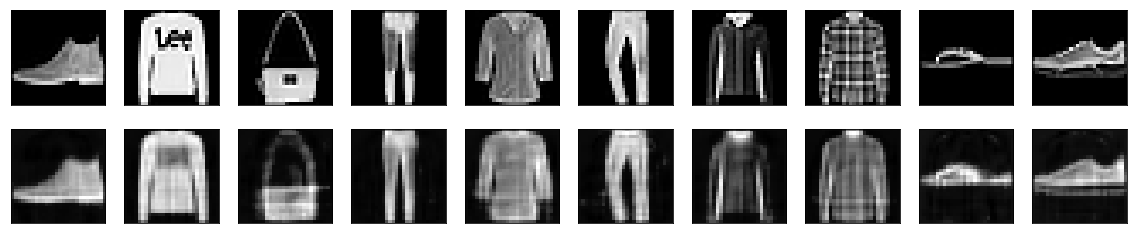

Histograms of the encodings - Sparsity (Hoyer):  0.34354639053344727


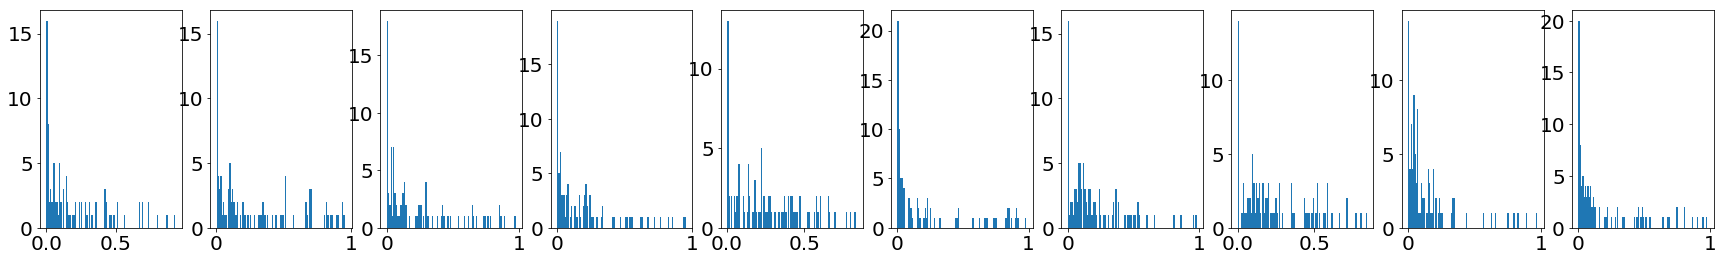

Atom images of the decoder


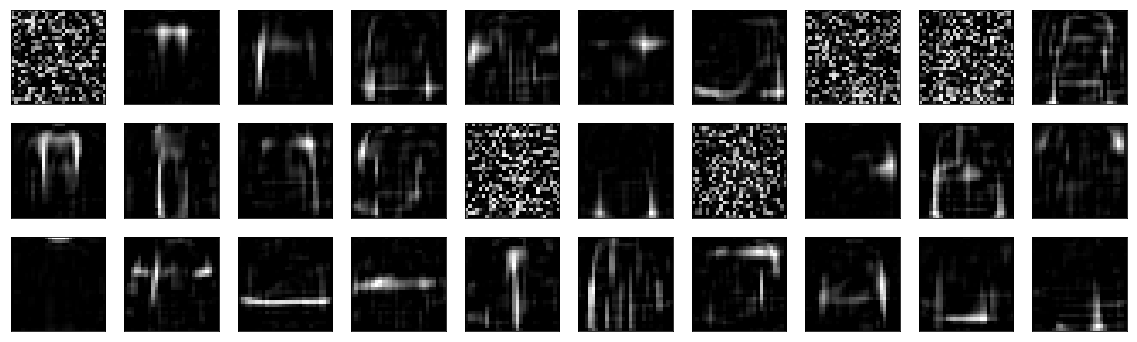

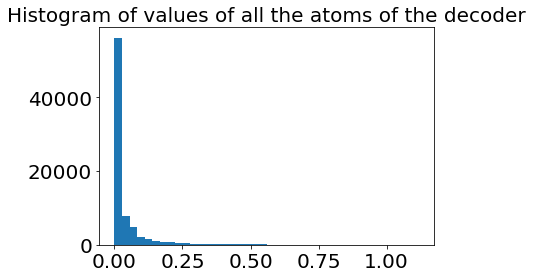

In [25]:
sp_o = 0.6
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(1)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_Hoyer_NonNegConstraint.load('18_10_30_dim100_Hoyer_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


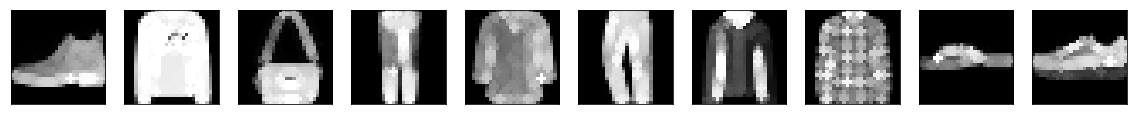

Dilatation of the reconstructions


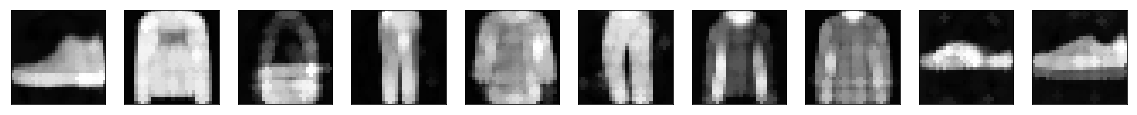

Original images and max-approximation to dilatation
Max-approx error to original:  1.0320307333946228  - Max-approx error to reconstruction:  1.0682383719444275


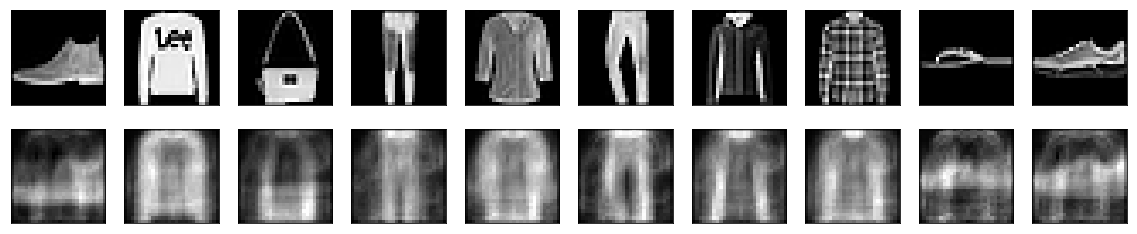

Dilated of the atom images of the decoder


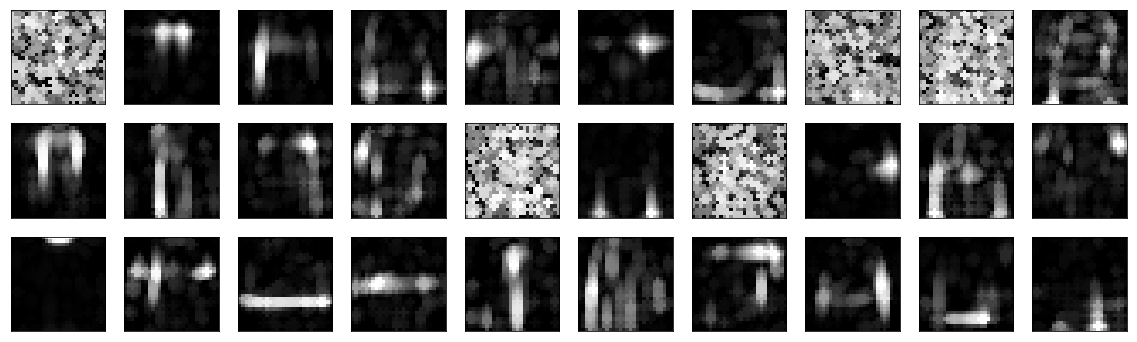

In [26]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.3 Sparsity_weight = 0.005 (sp_o = 0.6)

Original images and reconstructions - Reconstruction error:  0.010236156043410301


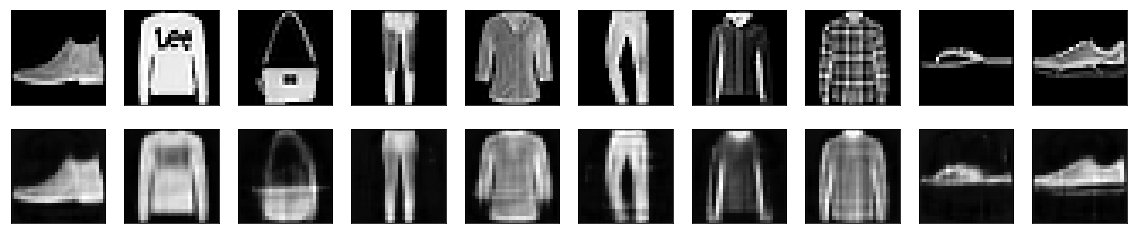

Histograms of the encodings - Sparsity (Hoyer):  0.46583276987075806


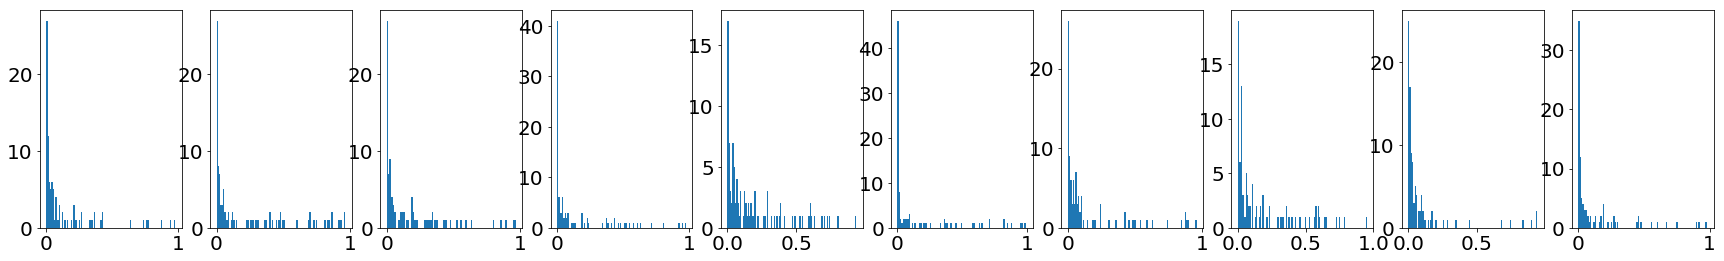

Atom images of the decoder


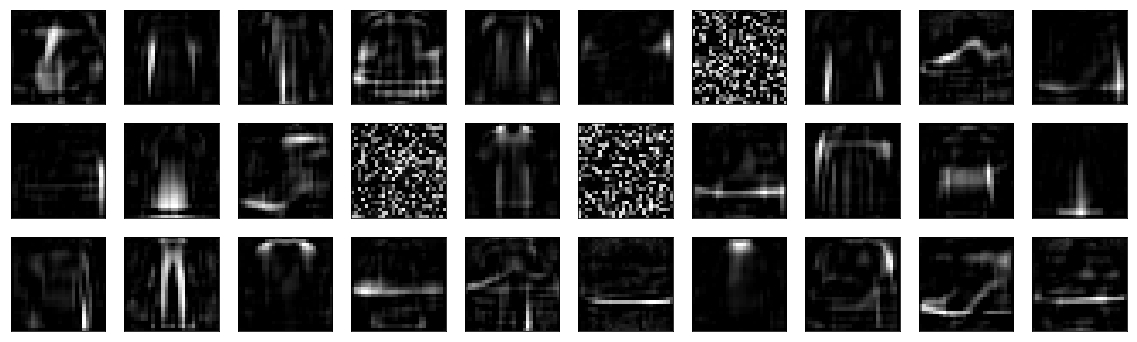

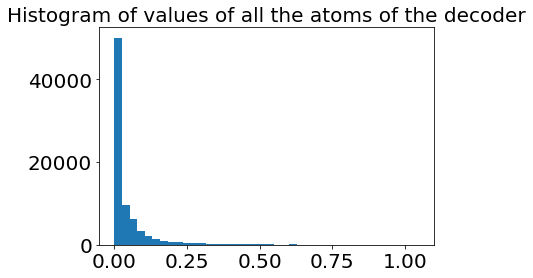

In [27]:
sp_o = 0.6
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(1)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_Hoyer_NonNegConstraint.load('18_10_30_dim100_Hoyer_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


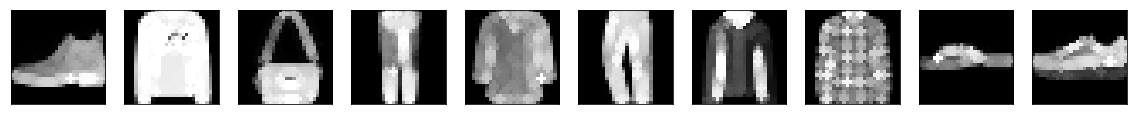

Dilatation of the reconstructions


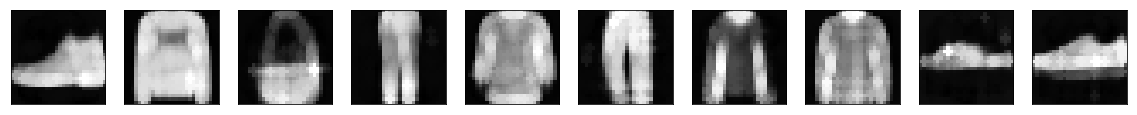

Original images and max-approximation to dilatation
Max-approx error to original:  0.5799207788467408  - Max-approx error to reconstruction:  0.5995121297836303


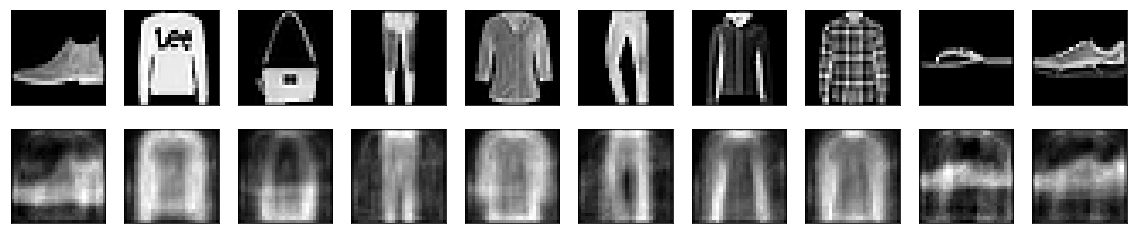

Dilated of the atom images of the decoder


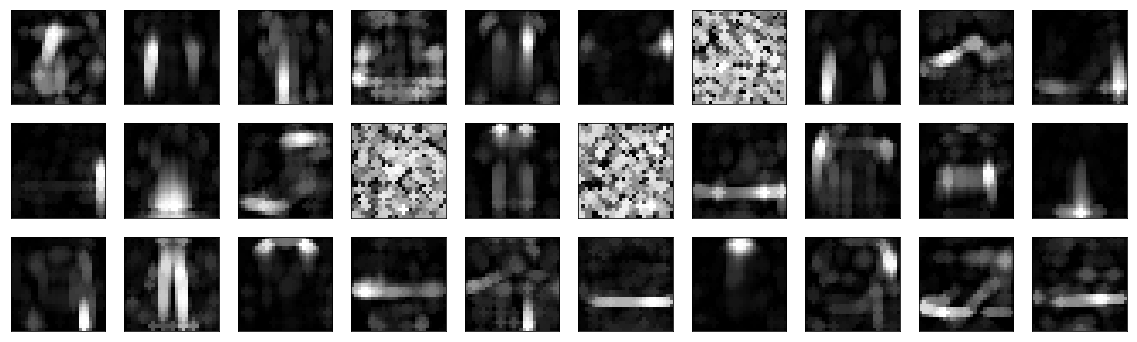

In [28]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.4 Sparsity_weight = 0.01 (sp_o = 0.6)

Original images and reconstructions - Reconstruction error:  0.010864157709479332


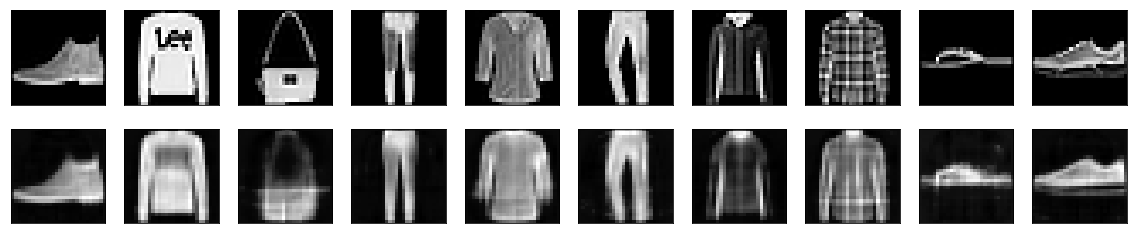

Histograms of the encodings - Sparsity (Hoyer):  0.545229971408844


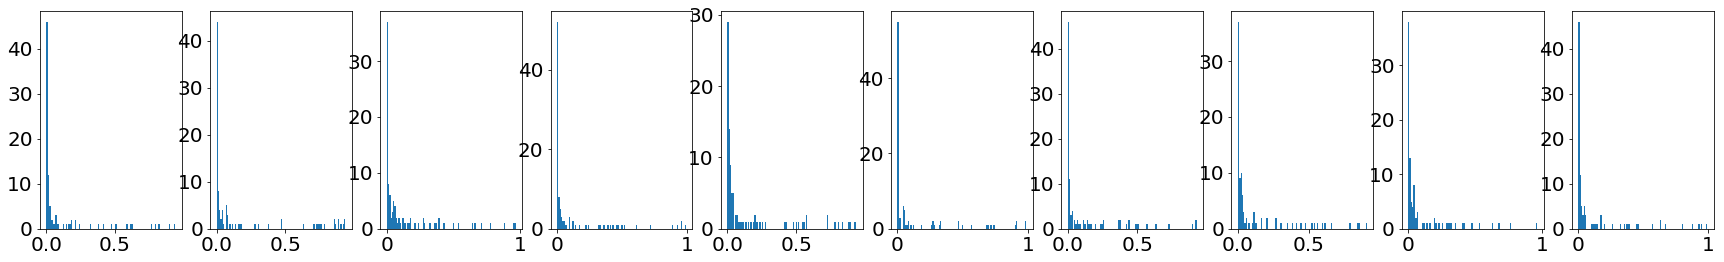

Atom images of the decoder


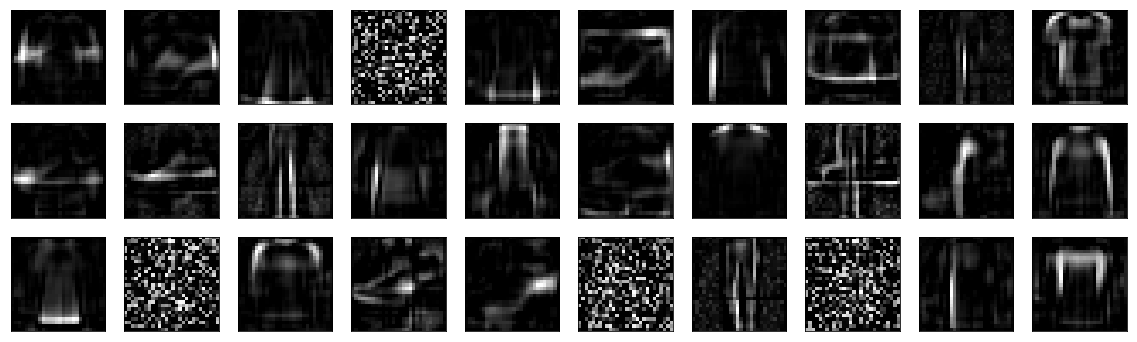

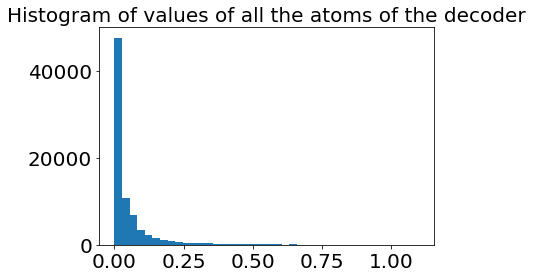

In [29]:
sp_o = 0.6
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(1)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_Hoyer_NonNegConstraint.load('18_10_30_dim100_Hoyer_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


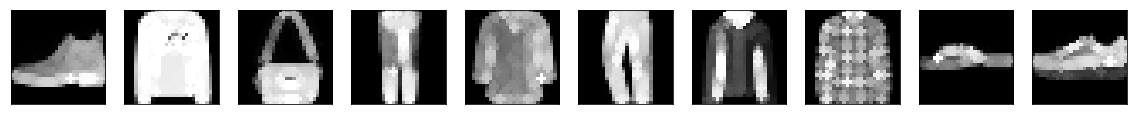

Dilatation of the reconstructions


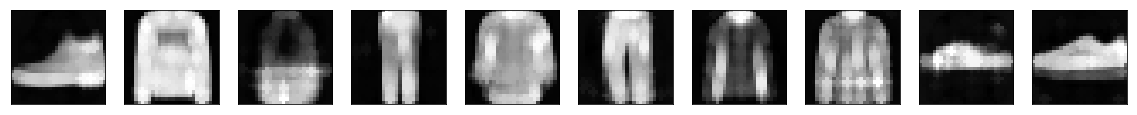

Original images and max-approximation to dilatation
Max-approx error to original:  0.38639329614639284  - Max-approx error to reconstruction:  0.39635230689048767


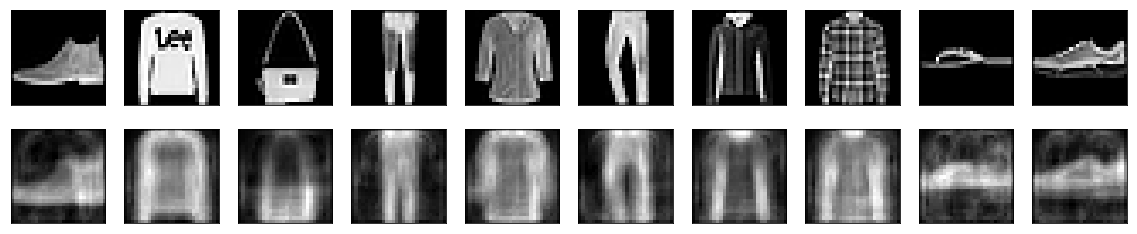

Dilated of the atom images of the decoder


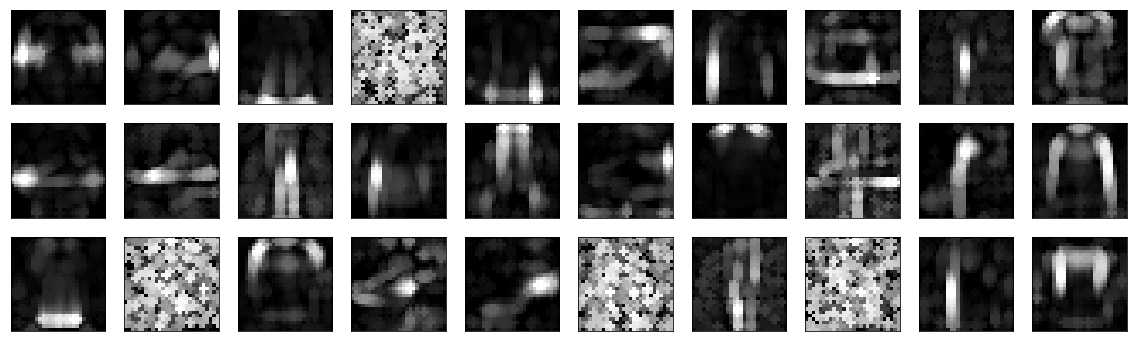

In [30]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.5 Sparsity_weight = 0.05 (sp_o = 0.06)

Original images and reconstructions - Reconstruction error:  0.011555464425683021


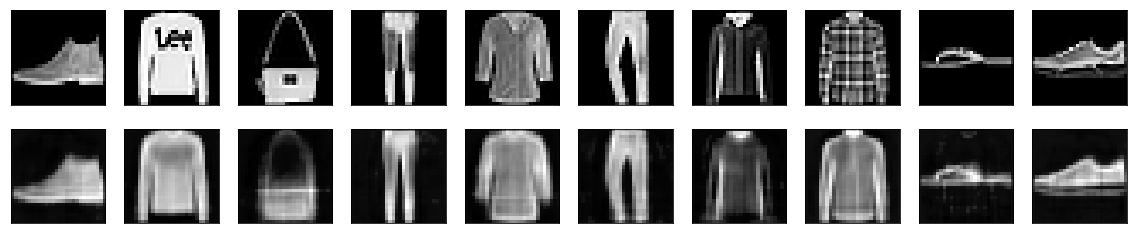

Histograms of the encodings - Sparsity (Hoyer):  0.5986717939376831


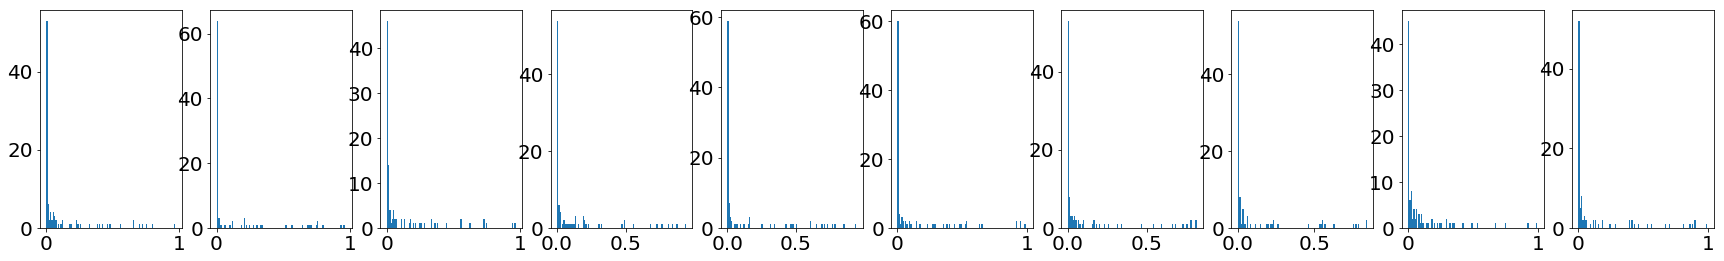

Atom images of the decoder


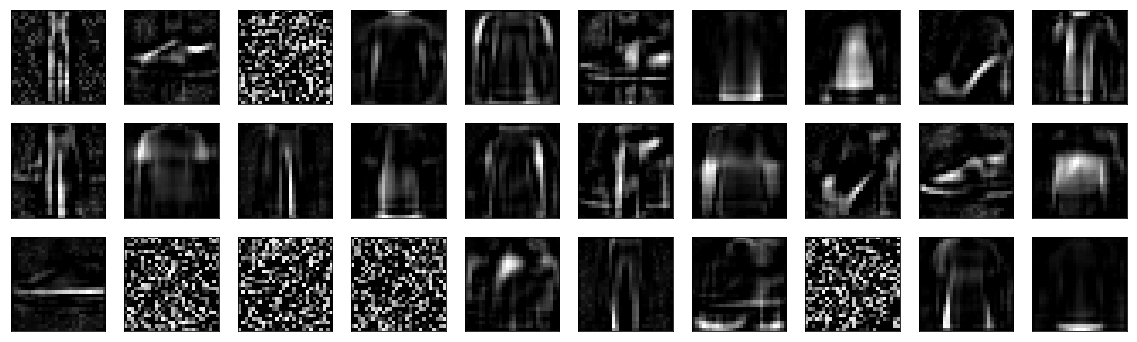

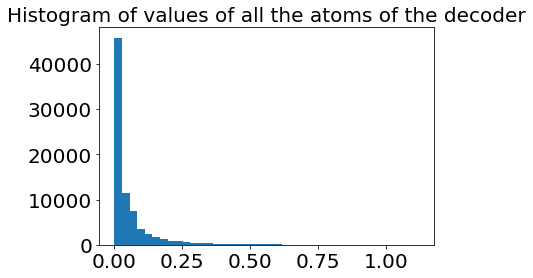

In [31]:
i = np.arange(8)[sparsity_weights==0.05][0]
j = np.arange(1)[sparsity_objectives==0.6][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_Hoyer_NonNegConstraint.load('18_10_30_dim100_Hoyer_0.1_0.6_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


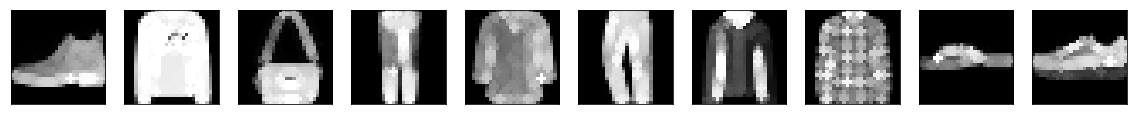

Dilatation of the reconstructions


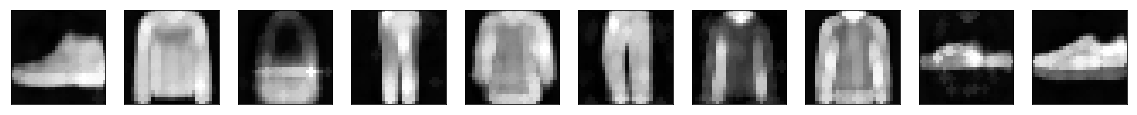

Original images and max-approximation to dilatation
Max-approx error to original:  0.2464900752544403  - Max-approx error to reconstruction:  0.2657501948595047


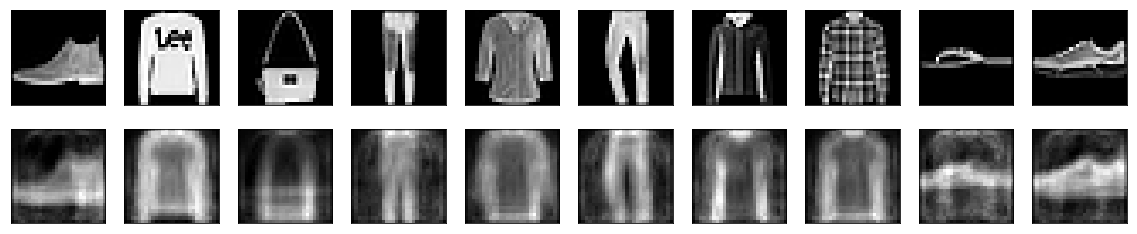

Dilated of the atom images of the decoder


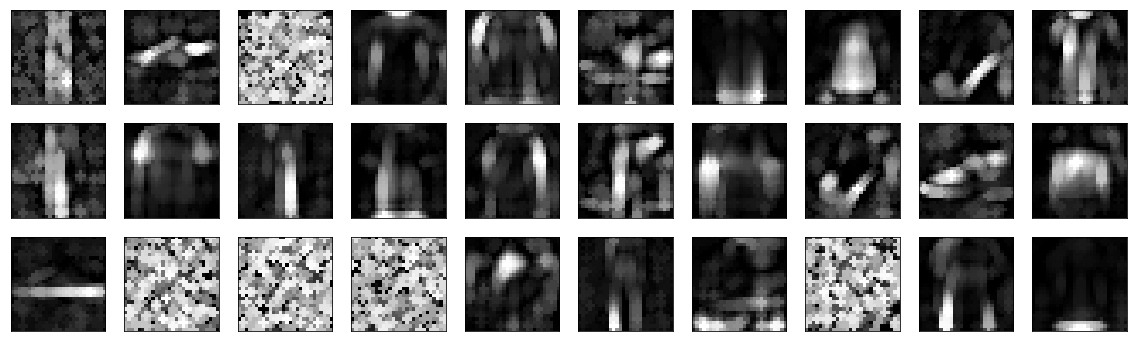

In [32]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.6 Sparsity_weight = 0.1 (sp_o = 0.6)

Original images and reconstructions - Reconstruction error:  0.012271729984879494


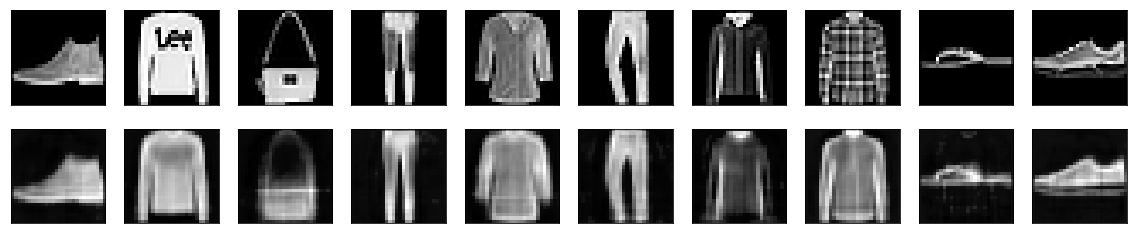

Histograms of the encodings - Sparsity (Hoyer):  0.5983812212944031


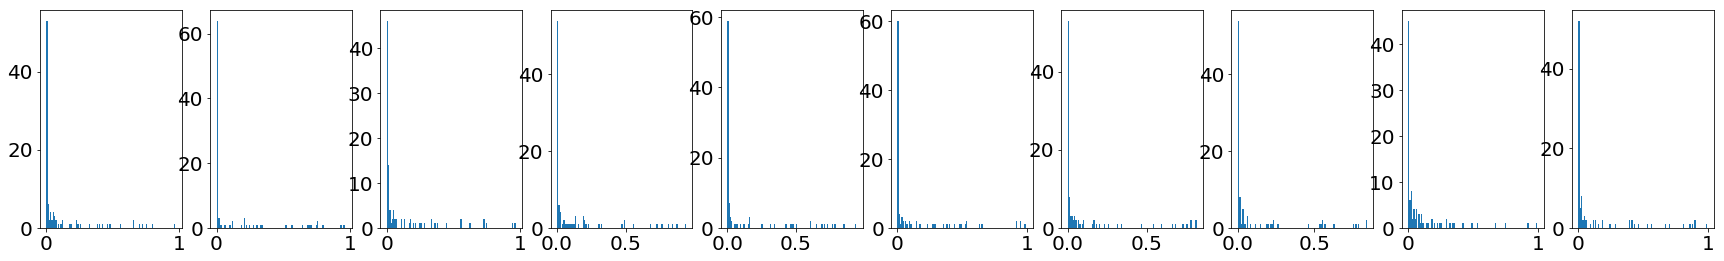

Atom images of the decoder


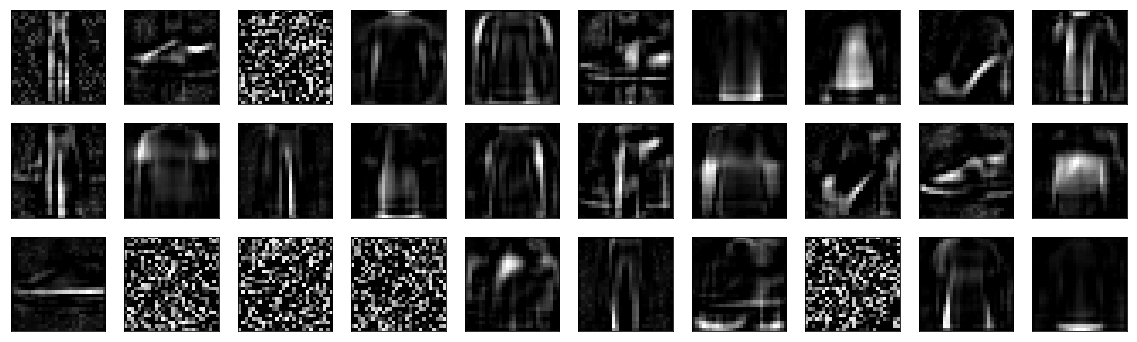

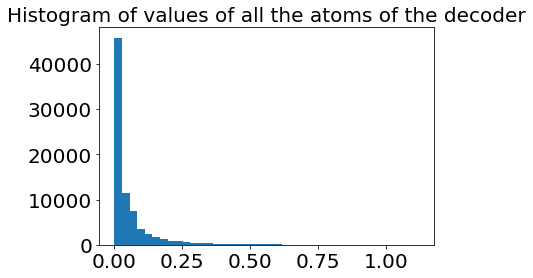

In [33]:
sp_o = 0.6
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(1)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_Hoyer_NonNegConstraint.load('18_10_30_dim100_Hoyer_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


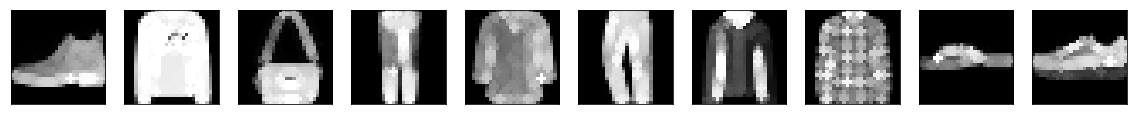

Dilatation of the reconstructions


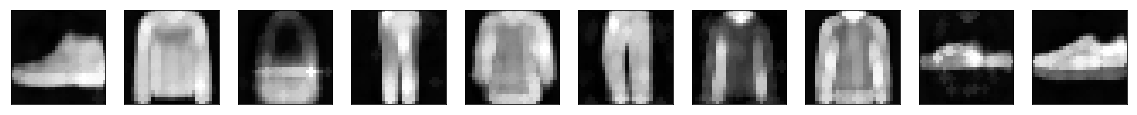

Original images and max-approximation to dilatation
Max-approx error to original:  0.2927798222541809  - Max-approx error to reconstruction:  0.2970888874530792


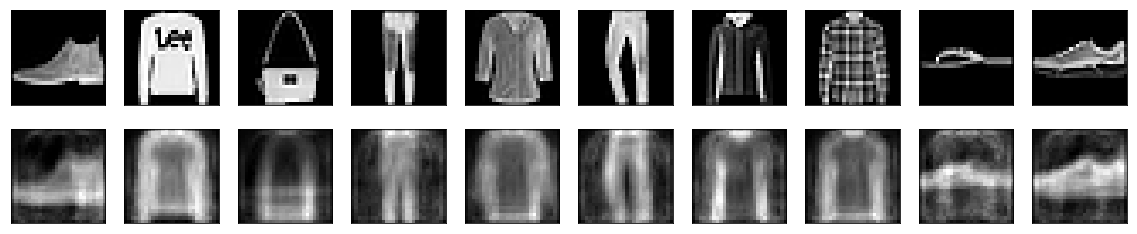

Dilated of the atom images of the decoder


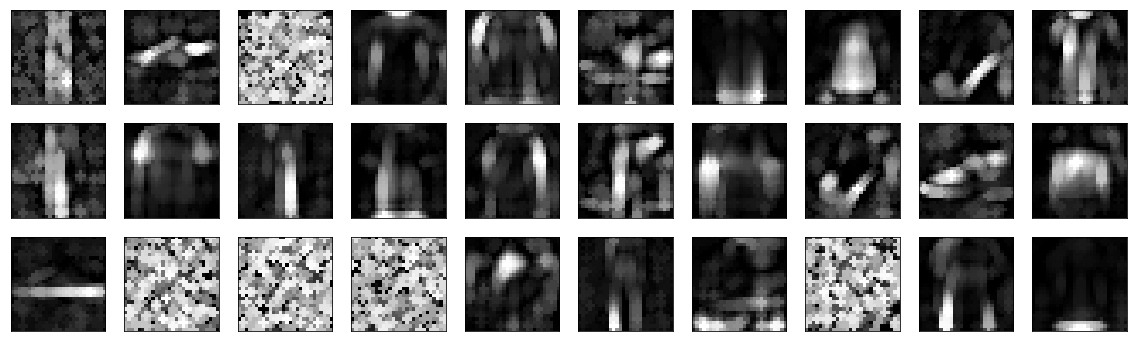

In [34]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.7 Sparsity_weight = 0.5 (sp_o = 0.6)

Original images and reconstructions - Reconstruction error:  0.014522846564650535


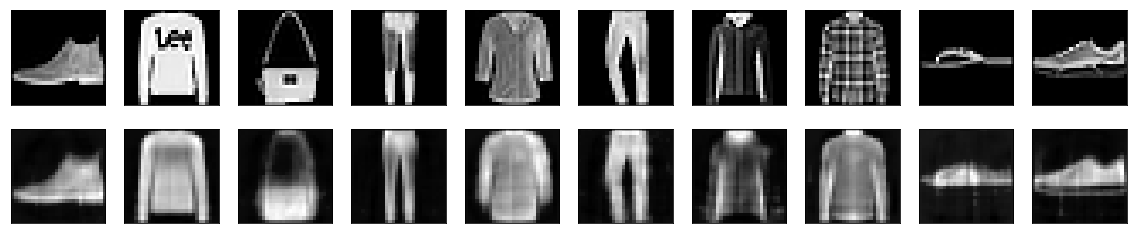

Histograms of the encodings - Sparsity (Hoyer):  0.5989537239074707


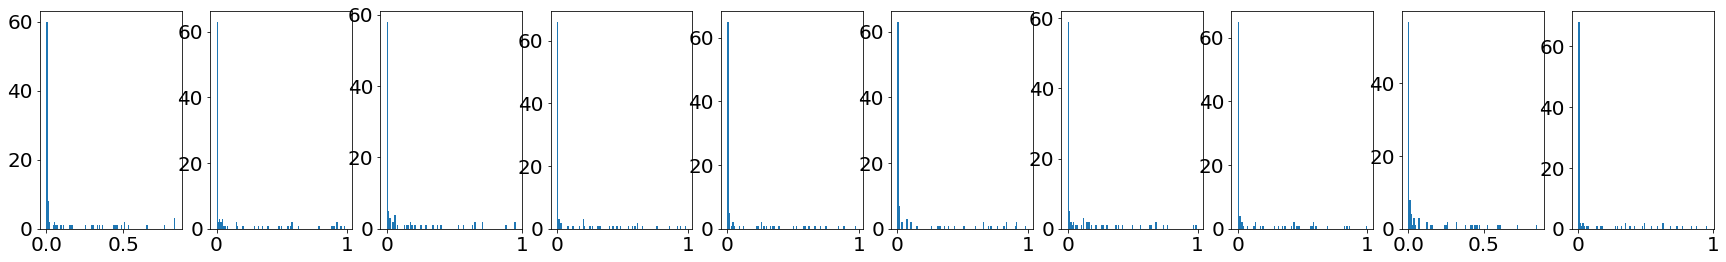

Atom images of the decoder


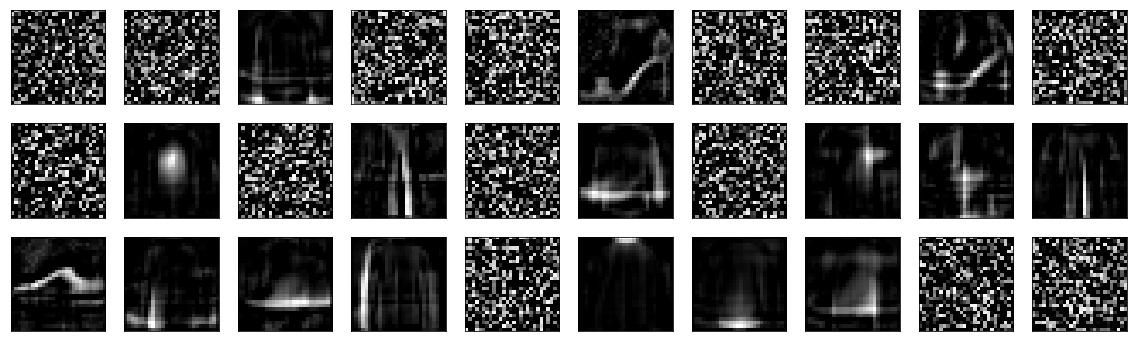

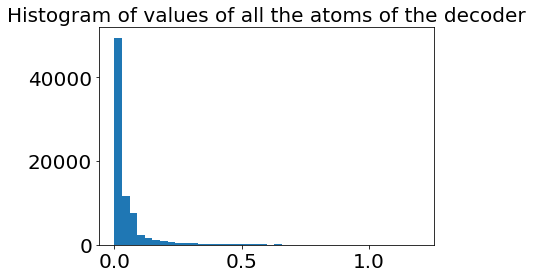

In [35]:
sp_o = 0.6
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(1)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_Hoyer_NonNegConstraint.load('18_10_30_dim100_Hoyer_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


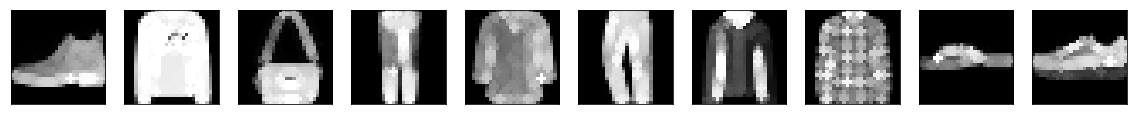

Dilatation of the reconstructions


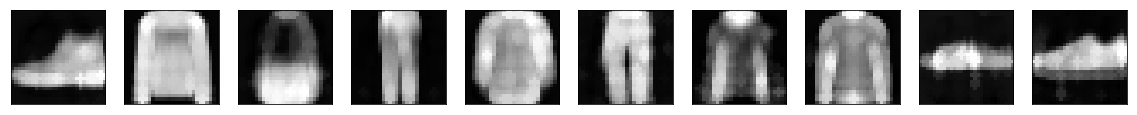

Original images and max-approximation to dilatation
Max-approx error to original:  0.3915272125244141  - Max-approx error to reconstruction:  0.4082405601978302


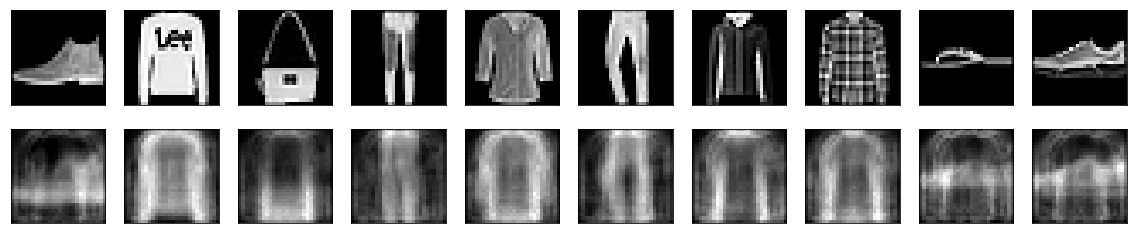

Dilated of the atom images of the decoder


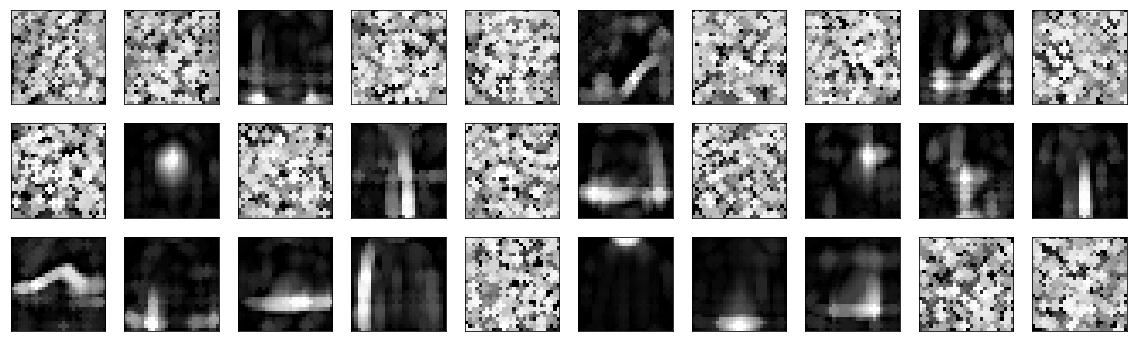

In [36]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.8 Sparsity_weight = 1 (sp_o = 0.6)

Original images and reconstructions - Reconstruction error:  0.015861176815629006


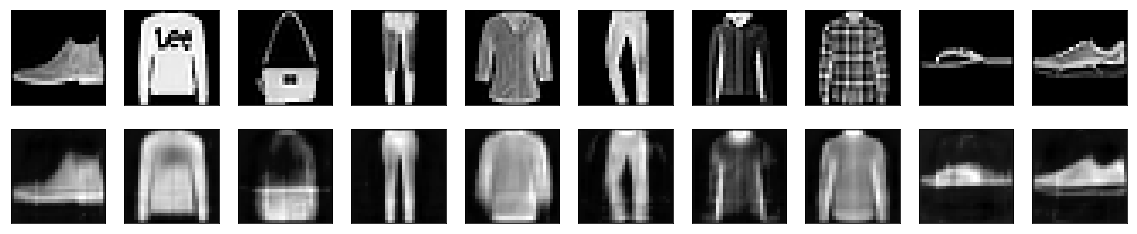

Histograms of the encodings - Sparsity (Hoyer):  0.5993752479553223


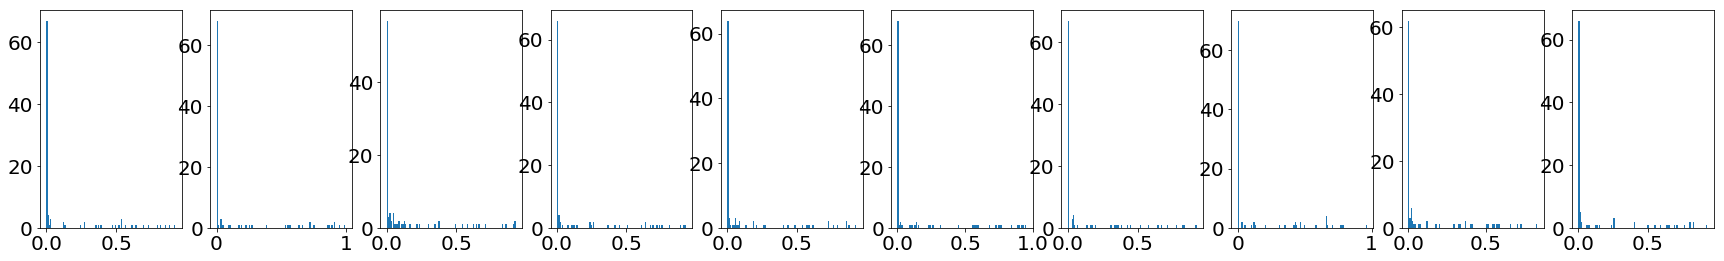

Atom images of the decoder


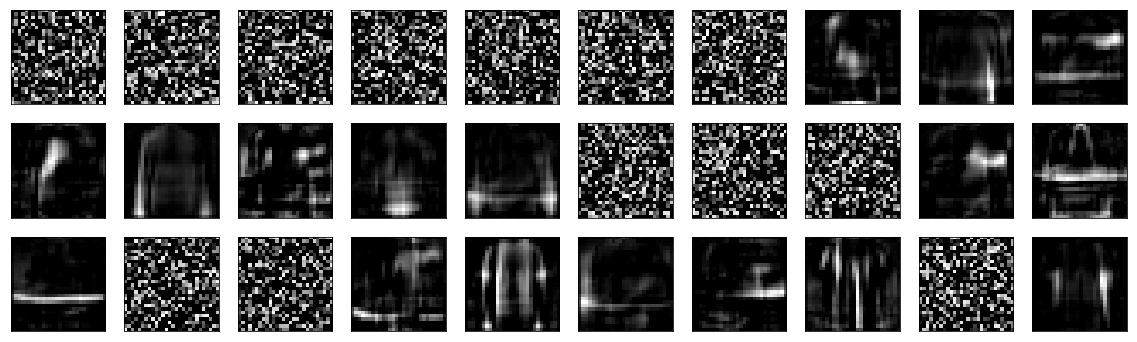

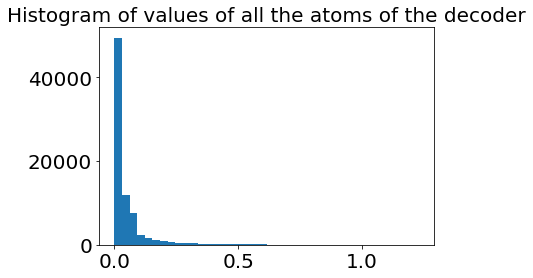

In [37]:
sp_o = 0.6
sp_w = 1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(1)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_Hoyer_NonNegConstraint.load('18_10_30_dim100_Hoyer_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


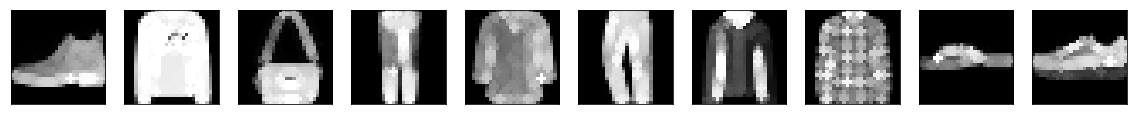

Dilatation of the reconstructions


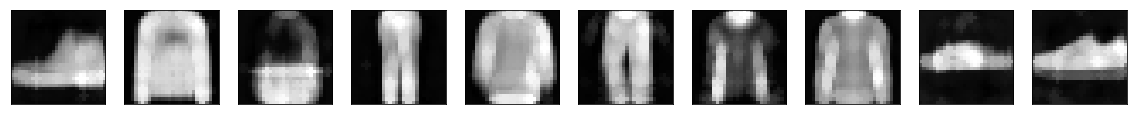

Original images and max-approximation to dilatation
Max-approx error to original:  0.44347421226501466  - Max-approx error to reconstruction:  0.4597158205509186


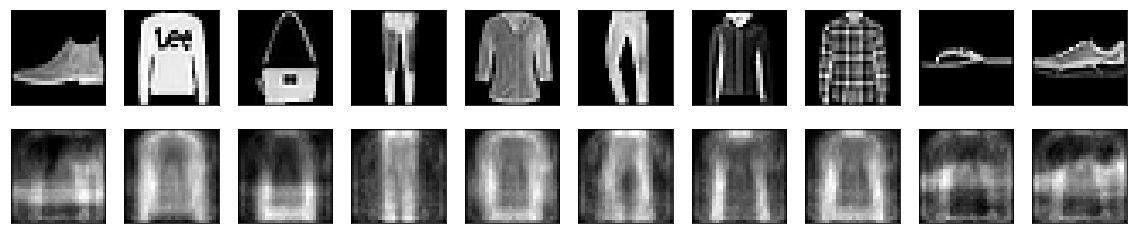

Dilated of the atom images of the decoder


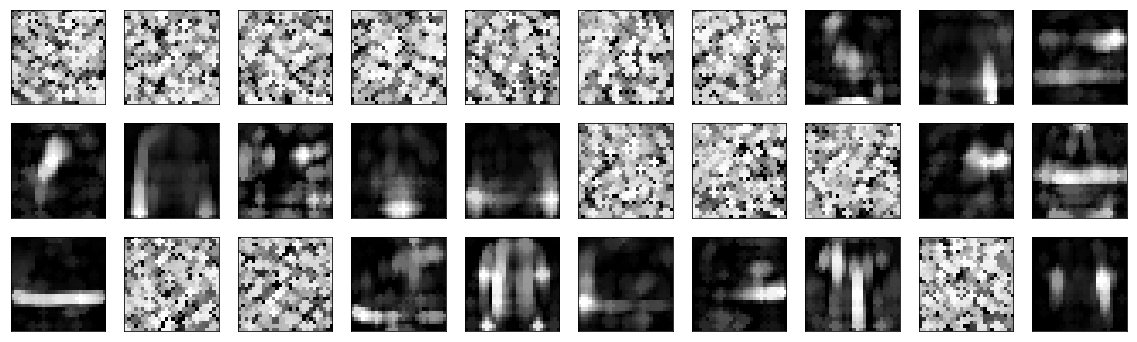

In [38]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)